# Heat Transfer Simulation

Disclaimer: this might be very inaccurate since it differs from experiments done. Or maybe I am wrong from the fundamentals.

In [1]:
import math
import matplotlib.pyplot as plt

[Rate of heat](http://hyperphysics.phy-astr.gsu.edu/hbase/thermo/heatra.html#c1)
$$P = \frac{kA(T_{hot} - T_{cold})}{d}$$
where $k$ is the thermal conductivity, $A$ is the surface area of transfer, $d$ is the thickness of the object, and $T$ is the temperatures. Later on, by converting this power into joules, heat change should be equal to the energy given by the rate of heat. The conversion is done using the specific heat formula.

[Specific heat](https://www.physicsclassroom.com/class/thermalP/Lesson-2/Measuring-the-Quantity-of-Heat)
$$Q = mc\Delta T$$
where $Q$ is the energy given, $m$ is the mass of the object, $c$ is the specific heat capacity, and $\Delta T$ is the change of temperature.

In [2]:
def rate_of_heat(k, a, t, te, d):
    kat = k * a * (t-te)
    return kat/d

## Example parameters 

In [3]:
coin_mass = 35.8 * 1e-3 # kg
water_mass = 100 * 1e-3 # kg

obj_c = 913.76 # joule per (kg kelvin)
obj_k = 237 

water_c = 4200 # joule per (kg kelvin)

coin_h = 2.47 * 1e-3 # m
coin_d = 27 * 1e-3 # m

water_t = 25.3125 # celcius
obj_t = 61.9125 # celcius

surface_area = ((math.pi * (coin_d/2)**2) + (coin_h * 10 * coin_d * math.pi))

## Main simulation

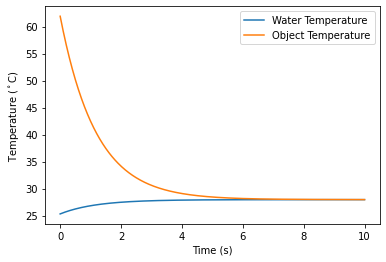

In [4]:
water_ts = [water_t]
obj_ts = [obj_t]
time = [0]

update_rate = 0.02 # seconds
simulation_time = 10 # seconds

for i in range(int(simulation_time/update_rate)):
    time.append(time[-1] + update_rate)
    
    heat = rate_of_heat(obj_k, surface_area, obj_ts[-1], water_ts[-1], coin_h * 10) * update_rate
    
    water_ts.append(water_ts[-1] + (heat/(water_c * water_mass)))
    obj_ts.append(obj_ts[-1] - (heat/(obj_c * coin_mass)))

plt.plot(time, water_ts, label="Water Temperature")
plt.plot(time, obj_ts, label="Object Temperature")
plt.xlabel('Time (s)')
plt.ylabel('Temperature ($^\circ$C)')
plt.legend()
plt.show()